In [1]:
import axisrules as axis
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import matplotlib
import numpy as np
import re
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()
la = pl.matplotlib.font_manager.FontManager()
lu = pl.matplotlib.font_manager.FontProperties(family = 'Linux Libertine')
la.findfont(lu)

# set Linux libertine as font
plt.rcParams["font.family"] = "Linux Libertine"
plt.rcParams["font.size"] = 18

In [2]:
# load "C:\Users\teoz0\Documents\Thèse\Assemblée\transformedData\applauses.csv"

applauses = pd.read_csv("C:\\Users\\teoz0\\Documents\\Thèse\\Assemblée\\transformedData\\applauses.csv")

columns = list(applauses.columns)
n_columns = len(columns)
matrix = applauses.to_numpy()
print(matrix.shape)
print(columns)

(11935, 11)
['RN', 'EPR', 'UDR', 'Dem', 'HOR', 'DR', 'LIOT', 'EcoS', 'LFI', 'GDR', 'SOC']


[4279.0, 2474.0, 2469.0, 2381.0, 2056.0, 1545.0, 1390.0, 1216.0, 1152.0, 857.0, 303.0]
[2056.0, 2381.0, 1216.0, 1390.0, 857.0, 1545.0, 303.0, 2474.0, 4279.0, 1152.0, 2469.0]
[2435.0, 480.0, 774.0, 1026.0, 897.0, 629.0, 316.0, 108.0, 117.0, 182.0, 82.0]
['LFI', 'EcoS', 'SOC', 'EPR', 'RN', 'DR', 'Dem', 'UDR', 'GDR', 'HOR', 'LIOT']


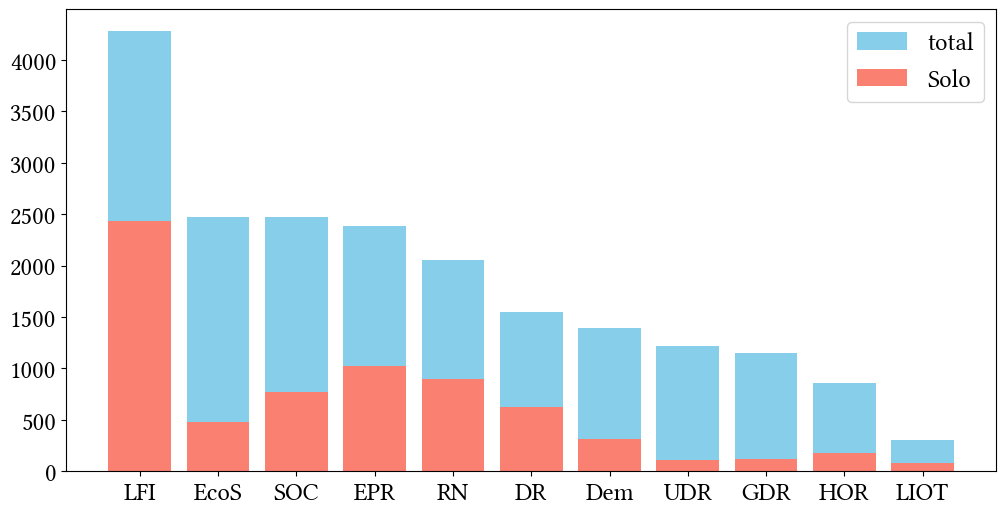

In [3]:
# plot sum on each column

applauses_per_group = matrix.sum(axis=0)
# count only rows of the matrix with sum = 1
solo_applauses_per_group = matrix[matrix.sum(axis=1) == 1].sum(axis=0)

# get decreasing order of columns
order = np.argsort(applauses_per_group)[::-1]


plt.figure(figsize=(12, 6))

print(list(applauses_per_group[order]))
print(list(applauses_per_group))
print(list(solo_applauses_per_group[order]))
print(list([columns[i] for i in order]))

plt.bar(range(n_columns), applauses_per_group[order], color = 'skyblue', label = "total")
plt.bar(range(n_columns), solo_applauses_per_group[order], color = 'salmon', label = "Solo")
plt.xticks(range(n_columns), [columns[i] for i in order])
plt.legend()

plt.show()

In [4]:
# remove LIOT column
liot_index = columns.index("LIOT")
matrix_reduced = np.delete(matrix, liot_index, axis=1)

matrix_reduced.shape

columns_reduced = list(applauses.columns)
columns_reduced.pop(liot_index)


'LIOT'

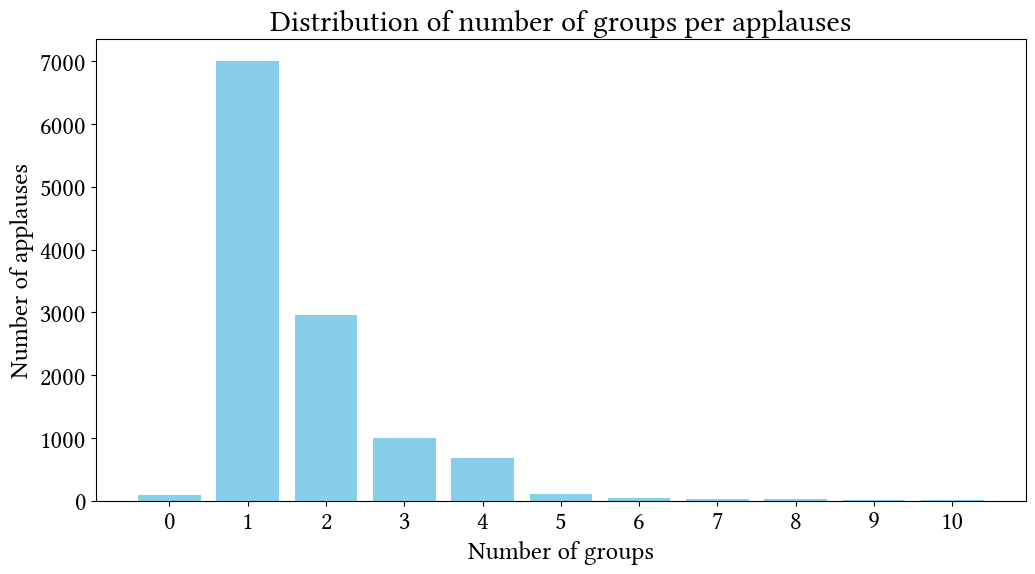

[85.0, 7008.0, 2963.0, 1004.0, 684.0, 101.0, 39.0, 22.0, 21.0, 4.0, 4.0]
[0.007121910347716799, 0.5871805613741098, 0.2482614160033515, 0.08412232928361961, 0.057310431503979894, 0.008462505236698786, 0.0032677000418935903, 0.0018433179723502304, 0.0017595307917888563, 0.00033514872224549644, 0.00033514872224549644]


In [5]:
# distribution of number of group per applauses
applauses_per_row = matrix_reduced.sum(axis=1)
nb_groups = np.zeros(11)
for i in range(len(applauses_per_row)):
    nb_groups[int(applauses_per_row[i])] += 1

plt.figure(figsize=(12, 6))
plt.bar(range(len(nb_groups)), nb_groups, color = 'skyblue')
plt.xticks(range(len(nb_groups)), range(len(nb_groups)))
plt.xlabel("Number of groups")
plt.ylabel("Number of applauses")
plt.title("Distribution of number of groups per applauses")
plt.grid(False)
plt.show()
print(list(nb_groups))
print(list(nb_groups / sum(nb_groups)))

In [6]:
# remove rows with sum = 0 or = 1
matrix_reduced = matrix_reduced[applauses_per_row > 1]
print(matrix_reduced.shape)

(4842, 10)


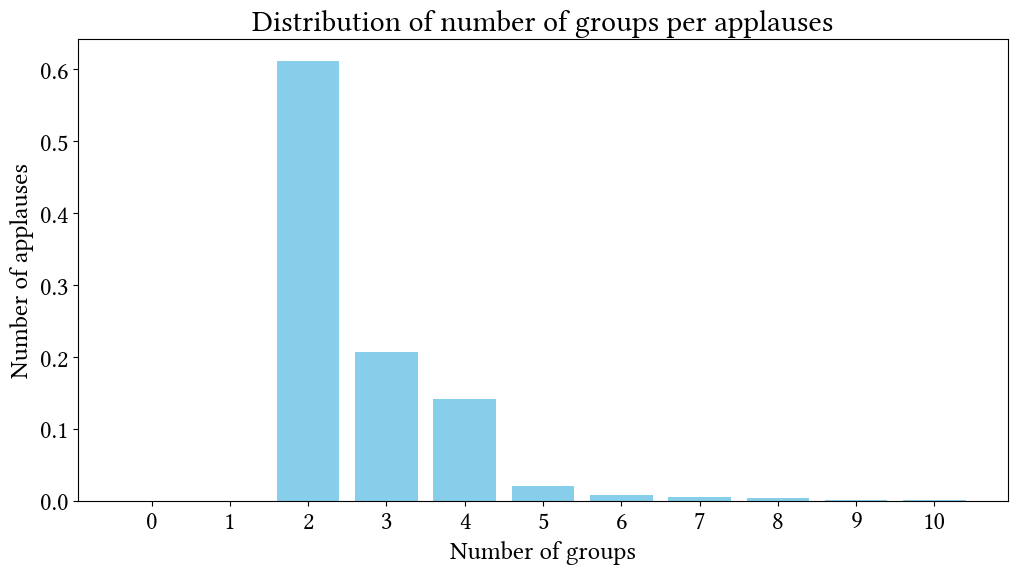

[0.0, 0.0, 2963.0, 1004.0, 684.0, 101.0, 39.0, 22.0, 21.0, 4.0, 4.0]
[0.0, 0.0, 0.6119372160264354, 0.2073523337463858, 0.1412639405204461, 0.020859149111937217, 0.0080545229244114, 0.004543577034283354, 0.004337050805452293, 0.0008261049153242462, 0.0008261049153242462]


In [7]:
# distribution of number of group per applauses
applauses_per_row = matrix_reduced.sum(axis=1)
nb_groups = np.zeros(11)
for i in range(len(applauses_per_row)):
    nb_groups[int(applauses_per_row[i])] += 1

plt.figure(figsize=(12, 6))
plt.bar(range(len(nb_groups)), nb_groups/(np.sum(nb_groups)), color = 'skyblue')
plt.xticks(range(len(nb_groups)), range(len(nb_groups)))
plt.xlabel("Number of groups")
plt.ylabel("Number of applauses")
plt.title("Distribution of number of groups per applauses")
plt.grid(False)
plt.show()
print(list(nb_groups))
print(list(nb_groups / sum(nb_groups)))

In [8]:
axis_rules = [axis.VoterDeletion, axis.MinimalFlips, axis.BallotCompletion, axis.MinimalSwaps, axis.ForbiddenTriples]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(matrix_reduced)
    res = rule_instance.bruteforce()
    print("Number of optimal axis :", len(res))
    print("Example :", axis.get_axis(res[0][0], columns_reduced))
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score/len(matrix_reduced), axis_score)
    print("\n")

Voter Deletion


100%|██████████| 40320/40320 [00:01<00:00, 35635.89it/s]


Number of optimal axis : 1
Example : GDR < LFI < EcoS < SOC < Dem < EPR < DR < HOR < RN < UDR
Score of this axis : 0.2224287484510533 1077.0


Minimal Flips


100%|██████████| 40320/40320 [00:01<00:00, 26027.14it/s]


Number of optimal axis : 1
Example : GDR < LFI < EcoS < SOC < Dem < EPR < DR < HOR < RN < UDR
Score of this axis : 0.23234200743494424 1125.0


Ballot Completion


100%|██████████| 40320/40320 [00:00<00:00, 68720.22it/s]


Number of optimal axis : 1
Example : GDR < LFI < EcoS < SOC < Dem < EPR < DR < HOR < RN < UDR
Score of this axis : 0.29388682362660057 1423.0


Minimal Swaps


100%|██████████| 40320/40320 [00:00<00:00, 49735.22it/s]


Number of optimal axis : 1
Example : GDR < LFI < EcoS < SOC < Dem < EPR < DR < HOR < RN < UDR
Score of this axis : 0.31020239570425445 1502.0


Forbidden Triples


100%|██████████| 40320/40320 [00:00<00:00, 41615.10it/s]

Number of optimal axis : 1
Example : GDR < LFI < EcoS < SOC < Dem < EPR < DR < HOR < RN < UDR
Score of this axis : 0.5600991325898389 2712.0




In [34]:
# save matrix_reduced to csv
matrix_reduced_df = pd.DataFrame(matrix_reduced, columns=columns_reduced)
# file: "data/applauses_reduced.csv"
matrix_reduced_df.to_csv("data/applauses_reduced.csv", index=False)

In [35]:
axis_order = res[0][0]

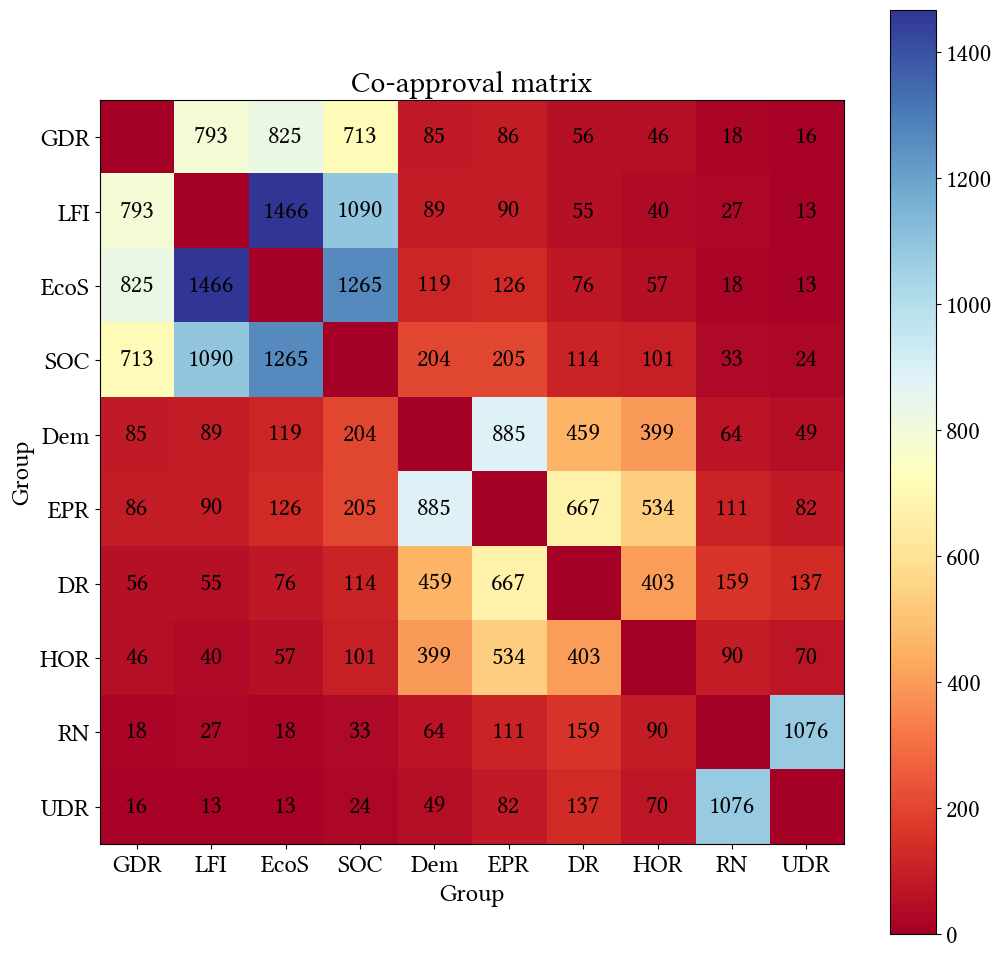

[[   0.  793.  825.  713.   85.   86.   56.   46.   18.   16.]
 [ 793.    0. 1466. 1090.   89.   90.   55.   40.   27.   13.]
 [ 825. 1466.    0. 1265.  119.  126.   76.   57.   18.   13.]
 [ 713. 1090. 1265.    0.  204.  205.  114.  101.   33.   24.]
 [  85.   89.  119.  204.    0.  885.  459.  399.   64.   49.]
 [  86.   90.  126.  205.  885.    0.  667.  534.  111.   82.]
 [  56.   55.   76.  114.  459.  667.    0.  403.  159.  137.]
 [  46.   40.   57.  101.  399.  534.  403.    0.   90.   70.]
 [  18.   27.   18.   33.   64.  111.  159.   90.    0. 1076.]
 [  16.   13.   13.   24.   49.   82.  137.   70. 1076.    0.]]


In [49]:
# matrix co-approval
n_columns = matrix_reduced.shape[1]

co_approval = np.zeros((n_columns, n_columns))  
for i in range(n_columns):
    for j in range(n_columns):
        co_approval[i, j] = matrix_reduced[:, i].dot(matrix_reduced[:, j])


# remove diagonal
for i in range(n_columns):
    co_approval[i, i] = 0

# plot co-approval matrix
plt.figure(figsize=(12, 12))
plt.imshow(co_approval[axis_order][:,axis_order], cmap='RdYlBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(n_columns), [columns_reduced[i] for i in axis_order])
plt.yticks(range(n_columns), [columns_reduced[i] for i in axis_order])
#write number in the matrix
for i in range(n_columns):
    for j in range(n_columns):
        if i ==j:
            continue
        if co_approval[i, j] > 0:
            plt.text(j, i, str(int(co_approval[axis_order[i], axis_order[j]])), ha='center', va='center', color='black')
plt.title("Co-approval matrix")
plt.xlabel("Group")
plt.ylabel("Group")
plt.grid(False)
plt.show()
print(co_approval[axis_order][:,axis_order])

In [50]:
data_np = np.array(co_approval[axis_order][:,axis_order])

# Format the output string
formatted_rows = []
for row in data_np:
    # Convert each number to int, then to string, and join with ", "
    formatted_row = ", ".join([str(int(num)) for num in row])
    # Add the surrounding brackets for the row
    formatted_rows.append("[" + formatted_row + "]")

# Join the rows with a comma and newline, and add outer brackets
# Adding newlines and indentation for readability similar to the input
output_string = "[\n " + ",\n ".join(formatted_rows) + "\n]"

print(output_string)

[
 [0, 793, 825, 713, 85, 86, 56, 46, 18, 16],
 [793, 0, 1466, 1090, 89, 90, 55, 40, 27, 13],
 [825, 1466, 0, 1265, 119, 126, 76, 57, 18, 13],
 [713, 1090, 1265, 0, 204, 205, 114, 101, 33, 24],
 [85, 89, 119, 204, 0, 885, 459, 399, 64, 49],
 [86, 90, 126, 205, 885, 0, 667, 534, 111, 82],
 [56, 55, 76, 114, 459, 667, 0, 403, 159, 137],
 [46, 40, 57, 101, 399, 534, 403, 0, 90, 70],
 [18, 27, 18, 33, 64, 111, 159, 90, 0, 1076],
 [16, 13, 13, 24, 49, 82, 137, 70, 1076, 0]
]


In [63]:
# keep all edges with > 150, and return in json with from: id, to: id, weight: weight

import json

json_list = []
for i in range(co_approval.shape[0]):
    for j in range(i+1,co_approval.shape[1]):
        if co_approval[i, j] > 150:
            json_list.append({"from": i, "to": j, "width": np.sqrt(int(co_approval[i, j])/100)})

print(json_list)

[{'from': 0, 'to': 2, 'width': 3.280243893371345}, {'from': 0, 'to': 5, 'width': 1.2609520212918492}, {'from': 1, 'to': 3, 'width': 2.9748949561287032}, {'from': 1, 'to': 4, 'width': 2.3108440016582685}, {'from': 1, 'to': 5, 'width': 2.582634314028992}, {'from': 1, 'to': 9, 'width': 1.4317821063276353}, {'from': 3, 'to': 4, 'width': 1.997498435543818}, {'from': 3, 'to': 5, 'width': 2.142428528562855}, {'from': 3, 'to': 9, 'width': 1.42828568570857}, {'from': 4, 'to': 5, 'width': 2.0074859899884734}, {'from': 6, 'to': 7, 'width': 3.8288379438153295}, {'from': 6, 'to': 8, 'width': 2.8722813232690143}, {'from': 6, 'to': 9, 'width': 3.556683848755748}, {'from': 7, 'to': 8, 'width': 2.8160255680657444}, {'from': 7, 'to': 9, 'width': 3.3015148038438356}, {'from': 8, 'to': 9, 'width': 2.670205984563738}]


In [55]:
columns_reduced

['RN', 'EPR', 'UDR', 'Dem', 'HOR', 'DR', 'EcoS', 'LFI', 'GDR', 'SOC']

In [40]:
# most frequent coalitions

coalitions = {}
for i in range(len(matrix_reduced)):
    coalition = tuple(np.where(matrix_reduced[i] == 1)[0])
    if coalition in coalitions:
        coalitions[coalition] += 1
    else:
        coalitions[coalition] = 1


# sort coalitions by frequency
sorted_coalitions = sorted(coalitions.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_coalitions))

# show 20 most frequent coalitions
for i in range(len(sorted_coalitions)):
    total_groups = len(sorted_coalitions[i][0])
    coalition = [columns_reduced[j] for j in sorted_coalitions[i][0]]
    coalition = ', '.join(coalition)
    print(coalition, sorted_coalitions[i][1], sorted_coalitions[i][0])

175
RN, UDR 943 (0, 2)
EcoS, LFI 493 (6, 7)
EcoS, LFI, GDR, SOC 427 (6, 7, 8, 9)
EPR, Dem 330 (1, 3)
EcoS, LFI, SOC 306 (6, 7, 9)
EcoS, SOC 269 (6, 9)
LFI, SOC 183 (7, 9)
EPR, DR 179 (1, 5)
EPR, Dem, HOR, DR 154 (1, 3, 4, 5)
EcoS, LFI, GDR 128 (6, 7, 8)
EPR, Dem, DR 120 (1, 3, 5)
LFI, GDR 104 (7, 8)
EPR, HOR 94 (1, 4)
EcoS, GDR, SOC 91 (6, 8, 9)
EPR, Dem, HOR 91 (1, 3, 4)
EcoS, GDR 76 (6, 8)
HOR, DR 53 (4, 5)
Dem, DR 51 (3, 5)
EPR, HOR, DR 50 (1, 4, 5)
LFI, GDR, SOC 43 (7, 8, 9)
RN, UDR, DR 43 (0, 2, 5)
GDR, SOC 38 (8, 9)
Dem, SOC 26 (3, 9)
Dem, HOR 24 (3, 4)
EPR, Dem, SOC 21 (1, 3, 9)
RN, EPR, UDR, Dem, HOR, DR 19 (0, 1, 2, 3, 4, 5)
EPR, SOC 16 (1, 9)
EPR, Dem, HOR, DR, EcoS, LFI, GDR, SOC 15 (1, 3, 4, 5, 6, 7, 8, 9)
Dem, HOR, DR 14 (3, 4, 5)
RN, EPR, UDR, DR 13 (0, 1, 2, 5)
EPR, Dem, HOR, DR, SOC 13 (1, 3, 4, 5, 9)
EPR, EcoS, LFI, GDR, SOC 12 (1, 6, 7, 8, 9)
UDR, DR 12 (2, 5)
Dem, EcoS, SOC 11 (3, 6, 9)
RN, UDR, HOR, DR 11 (0, 2, 4, 5)
RN, DR 11 (0, 5)
Dem, EcoS, LFI, GDR, SOC 11 (3,

In [45]:
coalitions[(1,7)]

4

In [29]:
axis_rules = [axis.VoterDeletionCircular,  axis.BallotCompletionCircular]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(matrix_reduced)
    res = rule_instance.bruteforce()
    print("Number of optimal axis :", len(res))
    print("Example :", axis.get_axis(res[0][0], columns_reduced))
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score/len(matrix_reduced))
    print("\n")

Voter Deletion Circular


100%|██████████| 40320/40320 [00:00<00:00, 41126.56it/s]


Number of optimal axis : 2
Example : GDR < UDR < RN < HOR < DR < EPR < Dem < SOC < EcoS < LFI
Score of this axis : 0.2207765386204048


Ballot Completion Circular


100%|██████████| 40320/40320 [00:00<00:00, 50928.65it/s]

Number of optimal axis : 2
Example : GDR < UDR < RN < HOR < DR < EPR < Dem < SOC < EcoS < LFI
Score of this axis : 0.27653862040479144


